# Feature Engineering

In [4]:
import sys
import pandas as pd
sys.path.append('../')
from utils.engineering import plot_corr, saving_datasets

# Data

In [5]:
df = pd.read_csv("./CSV/clean_pred_maintenance.csv")
df.head()

,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,failure_type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


### Impact:
- The column `failure_type` can be removed since it was already used for the EDA

In [6]:
df = df.drop(columns=["failure_type"])

# Correlation Matrix

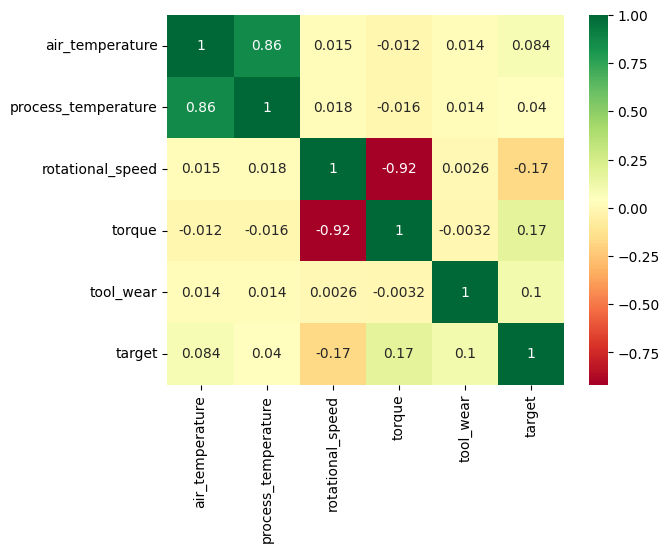

In [7]:
plot_corr(df, 'spearman')

### Observations:
- The "spearman" method is used to make sure the correlation is robust against the outliers
- `Process_temperature` and `air_temperature` are extremely correlated
- `Torque` and `rotational_speed` are almost perfectly inversely correlated, and the only columns that appear to have a minimal correlation to the target
### Impact:
- Based on this matrix, the creation of new features based on these four can be explored and used to see if theres any difference on the models

# Feature Engineering

In [8]:
df_all_features = df.copy()
df_all_features['power'] = df_all_features['torque'] * df_all_features['rotational_speed']
df_all_features['diference_temperature'] = df_all_features['air_temperature'] - df_all_features['process_temperature']

In [9]:
df_all_features.head()

,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,target,power,diference_temperature
0,M,298.1,308.6,1551,42.8,0,0,66382.8,-10.5
1,L,298.2,308.7,1408,46.3,3,0,65190.4,-10.5
2,L,298.1,308.5,1498,49.4,5,0,74001.2,-10.4
3,L,298.2,308.6,1433,39.5,7,0,56603.5,-10.4
4,L,298.2,308.7,1408,40.0,9,0,56320.0,-10.5


In [10]:
df_features = df_all_features.copy()
df_features = df_all_features.drop(columns=['torque', 'rotational_speed', 'process_temperature', 'air_temperature'])

In [11]:
df_features.head()

,type,tool_wear,target,power,diference_temperature
0,M,0,0,66382.8,-10.5
1,L,3,0,65190.4,-10.5
2,L,5,0,74001.2,-10.4
3,L,7,0,56603.5,-10.4
4,L,9,0,56320.0,-10.5


### Observations:
- Two datasets were created, one containing all original features and the new ones, and the other containing only the new ones and some of the originals
### Impact:
- All three datasets will be used on the modeling part to make sure that the best possible model is created, both in terms of metrics and process time

# Saving the files

In [12]:
saving_datasets(df, "Ml_Datasets", "original")
saving_datasets(df_all_features, "Ml_Datasets", "all_features")
saving_datasets(df_features, "Ml_Datasets", "new_features")